In [46]:

import matplotlib.pyplot as plt
import numpy as np
import random
import cv2
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import os
from PIL import Image, ImageOps

from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools

In [47]:

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import backend as K

In [44]:
from keras.layers import Conv2D, UpSampling2D, Input
from keras.models import Sequential, Model
from keras.preprocessing.image import ImageDataGenerator
from skimage.color import rgb2lab, lab2rgb, gray2rgb
from skimage.transform import resize
from skimage.io import imsave
import numpy as np
import tensorflow as tf
import keras
import os

from keras.applications.vgg16 import VGG16
vggmodel = VGG16(include_top=False,input_shape=(64,64,3),weights="imagenet",classes=2)
newmodel = Sequential() 

for i, layer in enumerate(vggmodel.layers):
    if i<15:         
      newmodel.add(layer)
newmodel.summary()
for layer in newmodel.layers:
  layer.trainable=False  

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)     

In [57]:
newmodel.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 16, 16, 256)     

In [41]:
path = "C:/Users/user/Desktop/Age and Gender/archive/UTKFace/"
path2 ="C:/Users/user/Desktop/Age and Gender/agegender_data/UTKFace1/"
files = os.listdir(path)
size = len(files)
print("Total samples:",size)


Total samples: 23708


In [48]:
images =[]
age =[]
gender =[]
for file in files:
    im = load_img(path+file)
    im = np.array(im)
    im= cv2.resize(im,(64,64))
    im = np.array(im, dtype="float") / 255.0
    split_var = file.split('_')
    images.append(im)
    age.append(int(split_var[0]))
    gender.append(int(split_var[1]))

In [50]:
temp = list(zip(images,age,gender))
random.shuffle(temp)
shuffled_images,huffled_age,shuffled_gender =zip(*temp)


In [54]:
set_1_images = np.array(images[:20000])
set_1_ages = np.array(age[:20000])
set_1_gender = np.array(gender[:20000])

In [55]:
gender_class = to_categorical(set_1_gender, dtype = "int",num_classes=2)

In [56]:

def my_train_test_split(X, Y, train_ratio=0.8):
    """return X_train, Y_train, X_test, Y_test"""
    n = X.shape[0]
    split = int(n * train_ratio)
    index = np.arange(n)
    np.random.shuffle(index)
    return X[index[:split]], Y[index[:split]], X[index[split:]], Y[index[split:]]

x_train ,y_train,x_test,y_test = my_train_test_split(set_1_images,gender_class)

In [58]:
x_train_predicted = newmodel.predict(x_train)

500/500 [==============================] - 92s 182ms/step


In [70]:
x_test_predicted = newmodel.predict(x_test)

125/125 [==============================] - 20s 162ms/step


In [72]:
def my_model(num_classes, activation, loss):
    model = Sequential() 
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(4,4,512)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation= activation))
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model
model =  my_model(2,"softmax",'categorical_crossentropy')
model.summary()

Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2365 (Conv2D)        (None, 4, 4, 64)          294976    
                                                                 
 batch_normalization_2360 (B  (None, 4, 4, 64)         256       
 atchNormalization)                                              
                                                                 
 conv2d_2366 (Conv2D)        (None, 4, 4, 64)          36928     
                                                                 
 batch_normalization_2361 (B  (None, 4, 4, 64)         256       
 atchNormalization)                                              
                                                                 
 conv2d_2367 (Conv2D)        (None, 4, 4, 32)          18464     
                                                                 
 flatten_3 (Flatten)         (None, 512)             

In [67]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [61]:
epochs = 50  # for better result increase the epochs
batch_size = 64

In [73]:
model_gender = my_model(2,"softmax",'categorical_crossentropy')
fit_gender = model_gender.fit(x_train_predicted,y_train , batch_size=batch_size,
                              epochs = epochs, validation_data = (x_test_predicted,y_test), steps_per_epoch= x_train_predicted.shape[0] // batch_size, callbacks= [early_stopping])

Epoch 1/200
250/250 [==============================] - 10s 37ms/step - loss: 0.3474 - accuracy: 0.8464 - val_loss: 0.2777 - val_accuracy: 0.8798
Epoch 2/200
250/250 [==============================] - 9s 36ms/step - loss: 0.2486 - accuracy: 0.8979 - val_loss: 0.2713 - val_accuracy: 0.8865
Epoch 3/200
250/250 [==============================] - 9s 35ms/step - loss: 0.2215 - accuracy: 0.9065 - val_loss: 0.2462 - val_accuracy: 0.8942
Epoch 4/200
250/250 [==============================] - 9s 36ms/step - loss: 0.2076 - accuracy: 0.9136 - val_loss: 0.3121 - val_accuracy: 0.8795
Epoch 5/200
250/250 [==============================] - 9s 36ms/step - loss: 0.1796 - accuracy: 0.9294 - val_loss: 0.2641 - val_accuracy: 0.8935
Epoch 6/200
250/250 [==============================] - 9s 36ms/step - loss: 0.1620 - accuracy: 0.9358 - val_loss: 0.2965 - val_accuracy: 0.8920
Epoch 7/200
250/250 [==============================] - 9s 36ms/step - loss: 0.1526 - accuracy: 0.9389 - val_loss: 0.3140 - val_accuracy

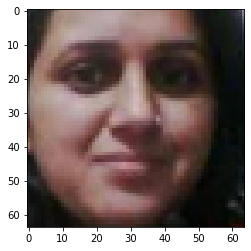

In [81]:
plt.imshow(x_test[11])

In [82]:
y_test[11]

array([0, 1])

In [83]:
ans = model_gender.predict(newmodel.predict(x_test[11].reshape(1,64,64,3)))

1/1 [==============================] - 0s 18ms/step


In [84]:
ans = np.argmax(ans)
ans

1

In [85]:
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import os
import cvlib as cv      

In [88]:
m1 = load_model("high_resol1.model")
m2 = load_model("high_resol2.model")

In [90]:
SIZE=64
HSIZE=256
# p1 = m1.predict(x_test[11].reshape(1,64,64,3))
predicted1 = np.clip(m1.predict(x_test[11].reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
predicted2 = np.clip(m2.predict(predicted1.reshape(1,HSIZE, HSIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)

1/1 [==============================] - 0s 244ms/step


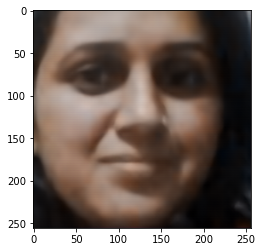

In [91]:
plt.imshow(predicted2)